In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Download MNIST dataset from Keras

mnist = tf.keras.datasets.fashion_mnist

In [4]:
# Loading dataset into training and test sets

(x_train, y_train),(x_test, y_test) = mnist.load_data()

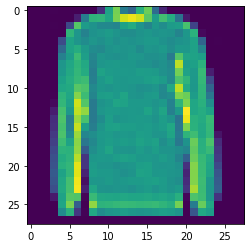

In [5]:
# Viewing data from the training images

plt.imshow(x_train[45])

# Basic Neural Network

In [6]:
# creating the class for callback functionality
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90): #The model should terminate when the accuracy is > 60%
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

# Normalising the training and test data
x_test = x_test / 255
x_train = x_train / 255

# Calling the myCallback class
callbacks = myCallback()

# Initiating the training model with one hidden layer
model = tf.keras.Sequential([tf.keras.layers.Flatten(), # Flattening the input layer
                             tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

# Compiling model with Adam optimizer and loss function is sparse_categorical_crossentropy
model.compile(tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the model.
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.5016 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3762 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3368 - accuracy: 0.8786
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3140 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2949 - accuracy: 0.8922
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2808 - accuracy: 0.8963
Epoch 7/10
59360/60000 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.9008
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2675 - accuracy: 0.9008


# Building the Convolution Neural Network

In [7]:
# Download MNIST dataset from Keras
mnist = tf.keras.datasets.fashion_mnist

# Loading dataset into training and test sets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# creating the class for callback functionality
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90): #The model should terminate when the accuracy is > 60%
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

# Normalising the training and test data
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test / 255.0

# Calling the myCallback class
callbacks = myCallback()

# Initiating the training model with 2 convolution layers. 64 of (3,3) filters 
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(), # Flattening the input layer
                             tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

# Compiling model with Adam optimizer and loss function is sparse_categorical_crossentropy
model.compile(tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the model. 
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 53s 877us/sample - loss: 0.4330 - accuracy: 0.8434
Epoch 2/10
60000/60000 [==============================] - 51s 844us/sample - loss: 0.2925 - accuracy: 0.8913
Epoch 3/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.9093 ETA: 0s - loss: 0.2471 - accuracy
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 50s 835us/sample - loss: 0.2472 - accuracy: 0.9093


In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 238us/sample - loss: 0.2818 - accuracy: 0.8948


[0.28181803369522096, 0.8948]

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [10]:
classification = model.predict(x_test)

print(classification[68])
print(y_test[68])

[2.2047978e-04 6.9439784e-07 1.4689983e-05 3.2830671e-05 8.6507771e-07
 1.4265109e-03 2.1562903e-06 9.0574604e-01 1.1251741e-04 9.2443161e-02]
9


# Visualising the Convolution Layers

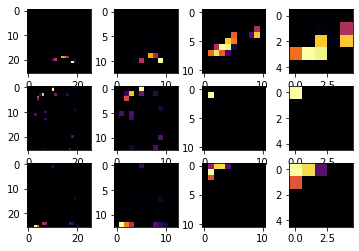

In [11]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

# Reducing the number of filters to 32

In [12]:
# Decreasing the number of filters to 32

# Download MNIST dataset from Keras
mnist = tf.keras.datasets.fashion_mnist

# Loading dataset into training and test sets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# creating the class for callback functionality
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90): #The model should terminate when the accuracy is > 60%
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

# Normalising the training and test data
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test / 255.0

# Calling the myCallback class
callbacks = myCallback()

# Initiating the training model with 2 convolution layers. 32 of (3,3) filters 
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(), # Flattening the input layer
                             tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

# Compiling model with Adam optimizer and loss function is sparse_categorical_crossentropy
model.compile(tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the model. 
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 28s 464us/sample - loss: 0.4729 - accuracy: 0.8281
Epoch 2/10
60000/60000 [==============================] - 29s 489us/sample - loss: 0.3184 - accuracy: 0.8821
Epoch 3/10
60000/60000 [==============================] - 26s 440us/sample - loss: 0.2736 - accuracy: 0.8987
Epoch 4/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.9100
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 31s 518us/sample - loss: 0.2429 - accuracy: 0.9099


# Decreasing the number of Convolution Layers

In [13]:
# Removing one Covolution layer

# Download MNIST dataset from Keras
mnist = tf.keras.datasets.fashion_mnist

# Loading dataset into training and test sets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# creating the class for callback functionality
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90): #The model should terminate when the accuracy is > 60%
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

# Normalising the training and test data
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test / 255.0

# Calling the myCallback class
callbacks = myCallback()

# Initiating the training model with 2 convolution layers. 64 of (3,3) filters 
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(), # Flattening the input layer
                             tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

# Compiling model with Adam optimizer and loss function is sparse_categorical_crossentropy
model.compile(tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the model. 
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 41s 692us/sample - loss: 0.3801 - accuracy: 0.8651
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9070
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 42s 701us/sample - loss: 0.2555 - accuracy: 0.9070


# Conclusion 

We can see that the training accuracy has been increased when convolution layers are introduced